# <font color = 'green'>Importing required libraries</font>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# <font color = 'green'>Loading the dataset</font>

In [74]:
url = 'https://github.com/AshishJangra27/Machine-Learning-with-Python-GFG/raw/main/Titanic/titanic_data.csv?raw=true'
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* Discrete data : SibSp,Parch
* Continous data : PassengerId,Fare,Age
* Categorical data : Embarked,Pclass
* Alphanumerics data : Cabin

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# <font color = 'green'>Numerical value analysis</font>

<AxesSubplot:>

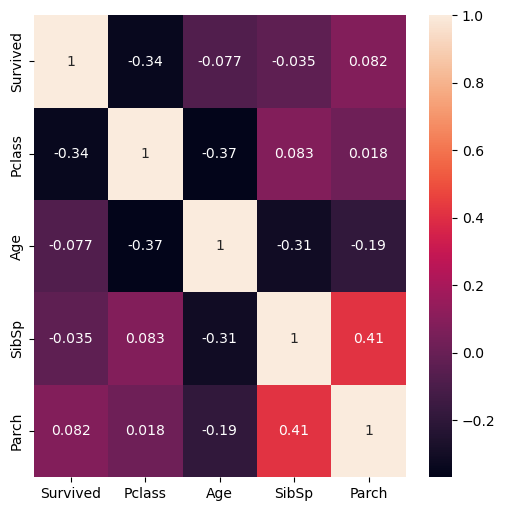

In [6]:
plt.figure(figsize = (6,6))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch']].corr(),annot = True)

From the heat map, it is inferable that the Pclass is correlated with the survival chances. Even though the Age parameter is not highly correlated with the survival parameter, but there is a high chance that the subset of the data can have correlation between age and survival parameters.

In [7]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Text(0, 0.5, 'Survival Probability')

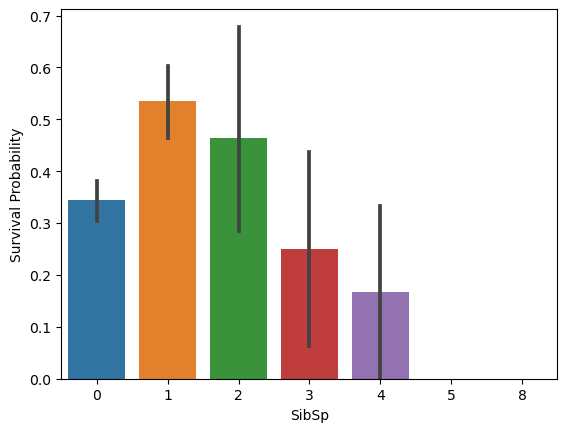

In [17]:
sns.barplot(x = 'SibSp',y = 'Survived', data = df).set_ylabel('Survival Probability')


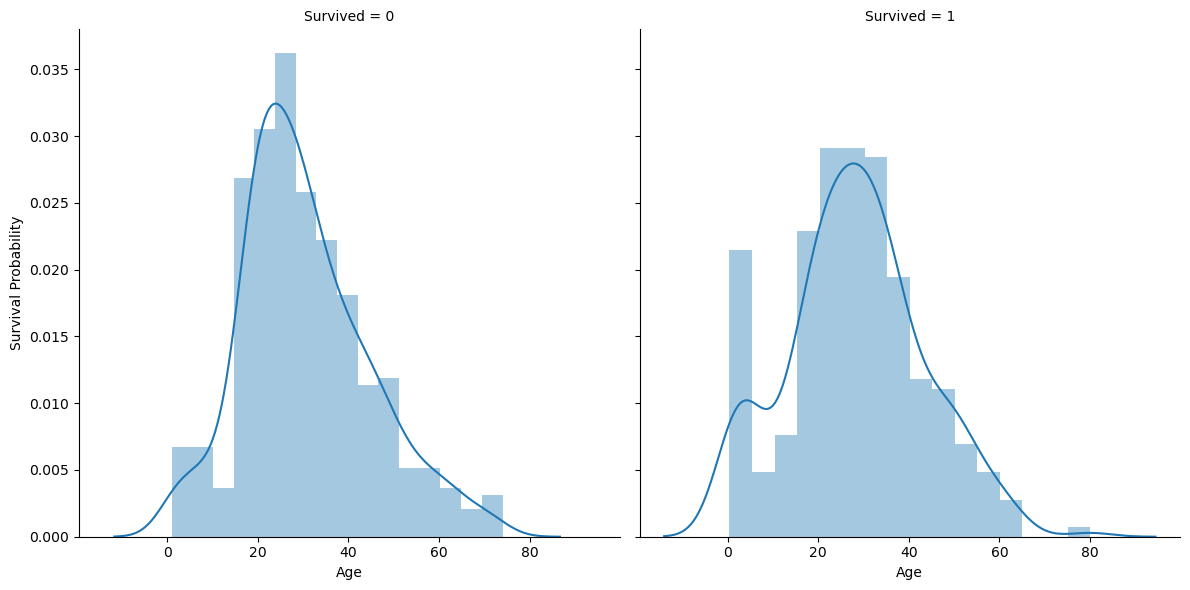

In [16]:
age_v = sns.FacetGrid(df, col = 'Survived',size=6)
age_v = age_v.map(sns.distplot, 'Age').set_ylabels('Survival Probability')

From the above distribution, it is inferable that the children have high chances of being survived and the elderly have low survival rate.

Text(0, 0.5, 'Survival Probability')

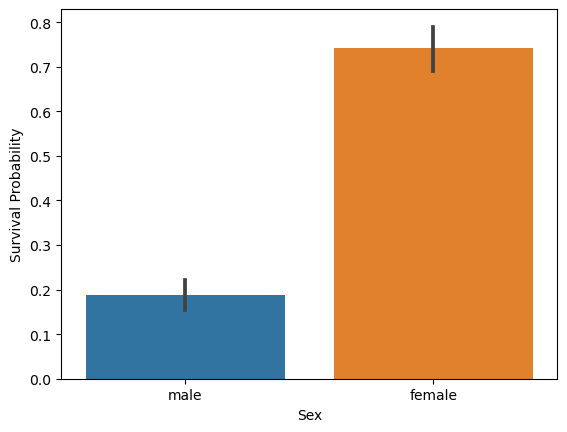

In [19]:
# Survival rate across each gender
sns.barplot(x= 'Sex',y = 'Survived',data = df).set_ylabel('Survival Probability')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

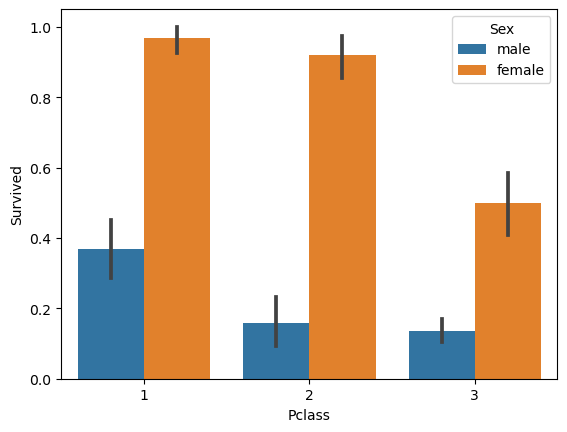

In [21]:
# survival rate across different classes
sns.barplot(x = 'Pclass',y = 'Survived',data = df,hue = 'Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

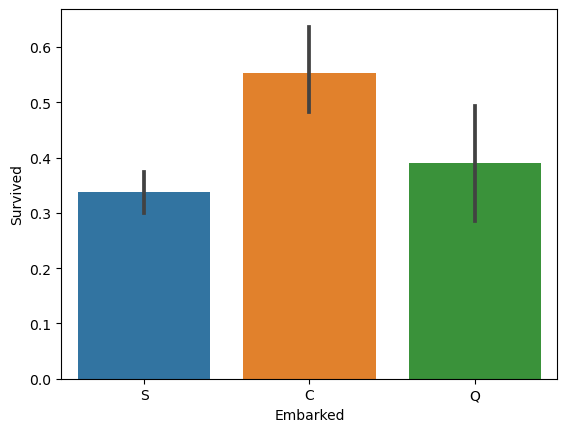

In [23]:
# survival rate among different embarked stations
sns.barplot(x = 'Embarked',y = 'Survived',data = df)

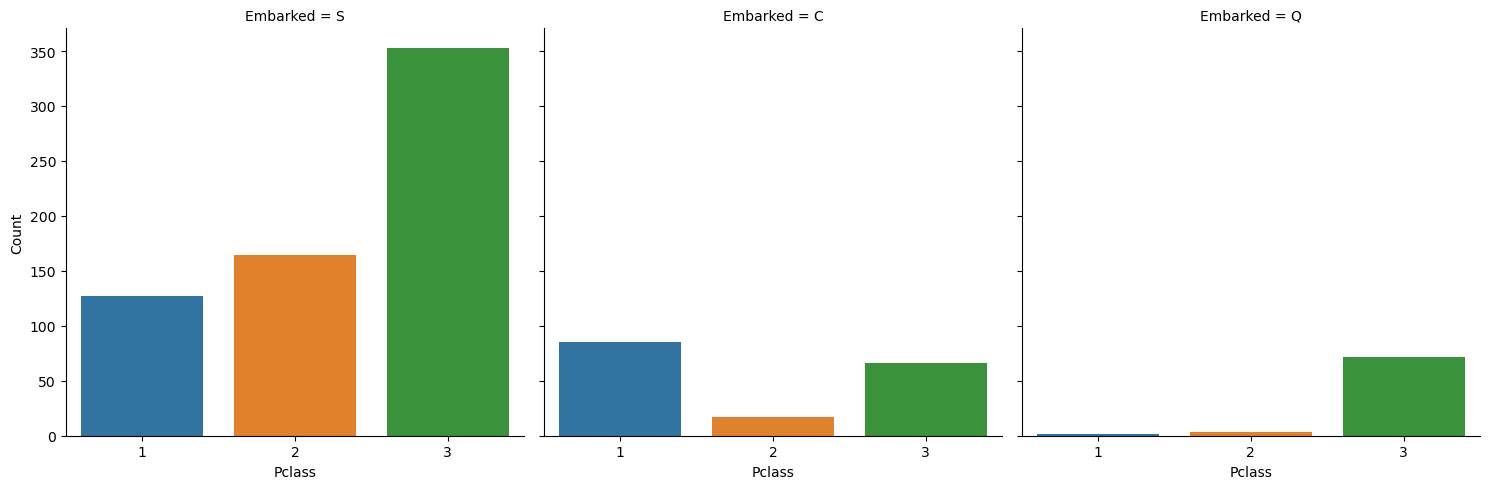

In [29]:
sns.factorplot('Pclass',col = 'Embarked',data = df, size = 5,kind = 'count').set_ylabels('Count')

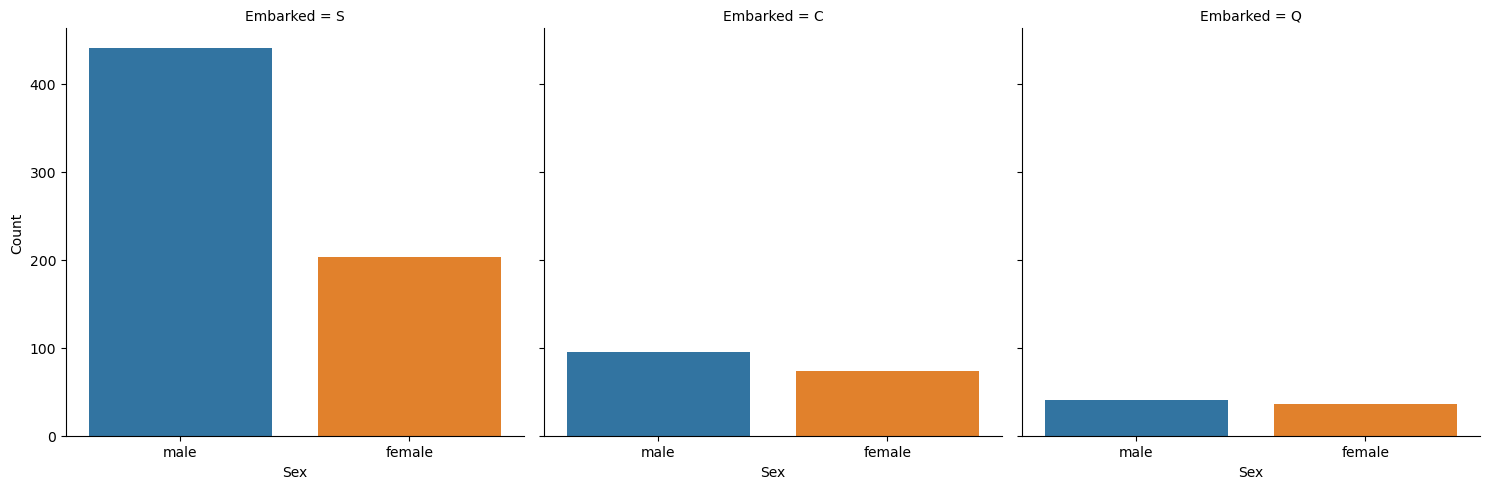

In [30]:
sns.factorplot('Sex',col = 'Embarked',data = df, size = 5,kind = 'count').set_ylabels('Count')

People who departured from C embarkment have high survival chances. But the main reasons behind those high chances are
* Proportion of Pclass 1 is high
* Proportion of female is high

# <font color = 'green'>Preparing the data</font>

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we have seen earlier, the age parameter is important. So we can't just drop those rows having age as null value. Cabin is that really important. So we just drop that column. The embarked column nulls can be filled with most occuring value.

In [39]:
mean = df['Age'].mean()
std = df['Age'].std()
nulls = df['Age'].isnull().sum()
print(mean,std,nulls)

29.69911764705882 14.526497332334044 177


In [43]:
age_r = np.random.randint(mean-std, mean+std, size = nulls)
age_r

array([33, 40, 41, 27, 38, 16, 31, 29, 34, 42, 16, 38, 33, 20, 34, 36, 18,
       37, 18, 35, 43, 23, 19, 15, 25, 20, 40, 15, 39, 43, 30, 33, 35, 28,
       19, 20, 38, 27, 24, 27, 28, 29, 29, 26, 20, 19, 26, 38, 26, 43, 38,
       26, 30, 39, 32, 31, 39, 42, 16, 42, 40, 15, 22, 41, 34, 27, 34, 39,
       20, 34, 19, 26, 21, 42, 23, 38, 36, 23, 22, 30, 22, 29, 34, 24, 40,
       43, 22, 36, 39, 20, 16, 31, 27, 18, 22, 32, 41, 22, 38, 41, 22, 20,
       19, 36, 22, 35, 24, 21, 41, 41, 32, 41, 33, 18, 32, 34, 21, 36, 17,
       39, 25, 21, 37, 32, 36, 41, 36, 16, 42, 29, 42, 24, 27, 31, 28, 25,
       20, 16, 32, 15, 22, 41, 36, 35, 35, 31, 16, 35, 16, 40, 42, 43, 28,
       27, 20, 26, 25, 37, 19, 32, 30, 42, 24, 29, 31, 17, 34, 16, 41, 31,
       34, 36, 28, 40, 21, 21, 26])

In [61]:
df['Age'].dtype

dtype('float64')

In [67]:
a = df['Age'].copy()
a[np.isnan(a)] = age_r
df['Age'] = a
df['Age'].isnull().sum()

0

In [68]:
df['Embarked'].fillna('S',inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
col_drop = ['PassengerId','Name','Ticket','Cabin','Fare']
df.drop(col_drop,axis = 1,inplace = True)

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [79]:
gender = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(gender)

In [80]:
embarked = {'S': 0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(embarked)

In [81]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


# <font color = 'green'>Splitting data</font>

In [96]:
x = df.drop(df.columns[0], axis=1)
y = df['Survived']
x = np.nan_to_num(x)

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.3,random_state = 0 )

# <font color = 'green'>Scaling</font>

In [88]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler()
xtrain = x_scaled.fit_transform(xtrain)
xtest = x_scaled.transform(xtest)


# <font color = 'green'>Classification</font>

In [104]:
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators = 1000)
log_reg = LogisticRegression()
knn_classifier = KNeighborsClassifier(5)

In [105]:
xtrain = np.nan_to_num(xtrain)

In [106]:
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)
log_reg.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [107]:
xtest = np.nan_to_num(xtest)

In [108]:
svc_classifier_pred = svc_classifier.predict(xtest)
dt_classifier_pred = dt_classifier.predict(xtest)
rf_classifier_pred = rf_classifier.predict(xtest)
log_reg_pred = log_reg.predict(xtest)
knn_classifier_pred = knn_classifier.predict(xtest)

In [109]:
from sklearn.metrics import accuracy_score
svc_classifier_acc = accuracy_score(ytest, svc_classifier_pred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_pred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_pred)
log_reg_acc = accuracy_score(ytest, log_reg_pred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_pred)

# <font color = 'green'>Accuracy</font>

In [113]:
print('SVC Classifier         :',round(svc_classifier_acc*100,3))
print('Decison Tree           :',round(dt_classifier_acc*100,3))
print('Random Forest          :',round(rf_classifier_acc*100,3))
print('Logistic regression    :',round(log_reg_acc*100,3))
print('K Nearest Neighbor     :',round(knn_classifier_acc*100,3))

SVC Classifier         : 82.836
Decison Tree           : 76.866
Random Forest          : 79.104
Logistic regression    : 79.851
K Nearest Neighbor     : 76.493


# <font color = 'green'>Confusion Matrix</font>

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, svc_classifier_pred)

array([[153,  15],
       [ 31,  69]], dtype=int64)

In [119]:
precision=(69)/(69+15)
precision

0.8214285714285714

In [120]:
recall = (69)/(69+31)
recall

0.69